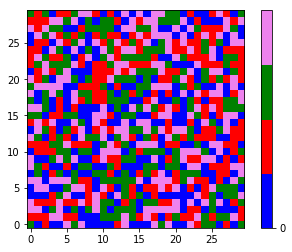

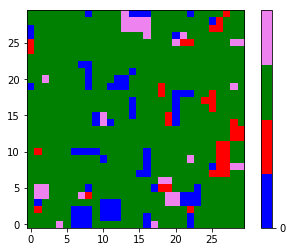

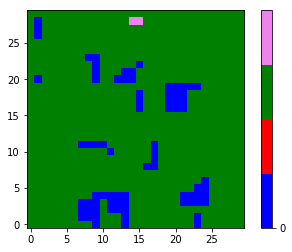

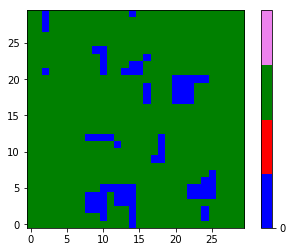

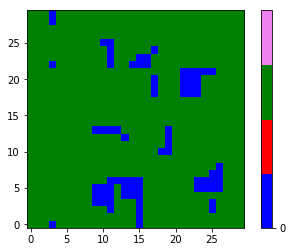

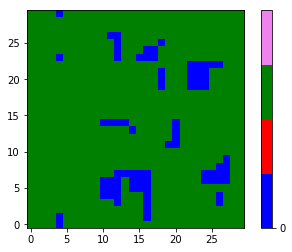

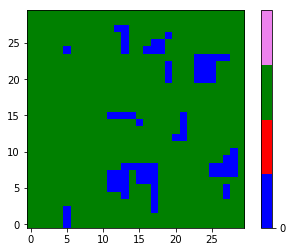

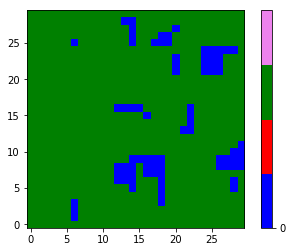

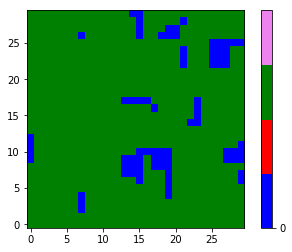

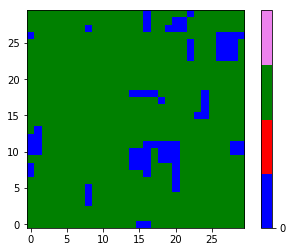

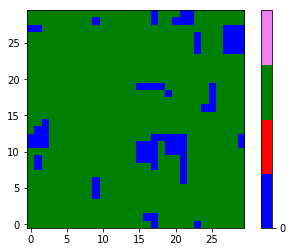

In [79]:
import numpy as np
from evol_games import GamesRunner
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

class lattice_gameboard:
    def __init__(self, game="PD", rows=30, columns=30, agents=("A1","A2","TFT", "nTFT"), weights=None):
        self.columns = columns
        self.rows = rows
        self.shape = [self.rows,self.columns]
        self.game = game
        
        self.mapping = {}
        for i,a in enumerate(agents):
            self.mapping[a] = i
            
        self.paired_payoff_matrix = GamesRunner().calc_payoffs(game=self.game)
        self.agents = agents
        self.colors = ['blue','red','green', 'violet']
        if weights is None:
            weights = [1/len(self.agents)] * 4
        self.weights = weights
        self.populate_lattice()
        #print(self.agent_lattice)
        self.draw_lattice(self.agent_lattice)
        for i in range(0,10):
            self.run_generation()

    def run_generation(self):
        self.calculate_payoffs()
        self.update_lattice()
        self.draw_lattice(self.agent_lattice)

    def populate_lattice(self):
        """ This populates a lattice with a mix of agents
        """
        #np.random.randint(0,4,[30,30])
        self.agent_lattice = np.random.choice(a=self.agents,size=[self.rows,self.columns],p=self.weights)

    def update_lattice(self):
        """ This updates the lattice where each cell adopts the strategy of the most successful neighbor
        """
        #print(np.indices(self.shape))
        #neighbors = self.neighbor_indices(np.indices(self.shape))
        #neighbor_agents = self.agent_lattice[neighbors[:,0], neighbors[:,1]]
        new_lattice = self.agent_lattice.copy()
        for i in range(0,self.rows):
            for j in range(0, self.columns):
                neighbors = self.neighbor_indices([i,j])
                neighbor_idx = (neighbors[:,0], neighbors[:,1])
                neighbor_agents = self.agent_lattice[neighbor_idx]
                best_index = np.argmax(self.payoffs[neighbor_idx])
                new_lattice[i,j] = neighbor_agents[best_index]
#                 print(best_index)
#                 print(self.payoffs[neighbor_idx])
#                 print(neighbor_agents)
#                print(neighbor_agents)
        self.agent_lattice = new_lattice
    
    def neighbor_indices(self, index):
        """ Return indices of neighbors. This includes the original cell as a "neighbor".
        Assumes a square lattice
        Args:
            index (x,y tuple)
        Returns:
            list of x,y tuples for all neighbors
        """
        return (np.add(cartesian_product([-1, 0, 1], [-1, 0, 1]), index )) % self.rows

    def calculate_payoffs(self):
        """ This calculates the payoffs of the lattice
        """
        payoffs = np.zeros([self.rows, self.columns])
        for i in range(0,self.rows):
            for j in range(0, self.columns):
                payoffs[i,j] = self.calculate_cell_payoff(i,j)
        self.payoffs = payoffs

    def calculate_cell_payoff(self,i,j):
        """ Calculate the payoff of a cell
        """
        central_agent = self.agent_lattice[i,j]
        #print(central_agent)
        neighbors = self.neighbor_indices([i,j])
        neighbor_agents = self.agent_lattice[neighbors[:,0], neighbors[:,1]]
        
        # Remove central agent
        neighbor_agents = np.delete(arr=neighbor_agents, obj=4, axis=0)

        r = 0
        for agent in neighbor_agents:
            #print(agent)
            r += self.paired_payoff_matrix[(central_agent,agent)][0]
        return r/9
    
    def draw_lattice2(self, lattice):
        cmap = mpl.colors.ListedColormap(self.colors)
        #categories, integer_encoding = np.unique(lattice, return_inverse=True)
        #integer_encoding = integer_encoding.reshape([self.rows,self.columns])
        int_lattice = replace_array_with_map(lattice, self.mapping, new_type=object).astype(int)
        print(int_lattice)
        plt.imshow(int_lattice, interpolation='nearest', cmap=cmap, origin='lower')
        plt.show()

    def draw_lattice(self, lattice):
        cmap = mpl.colors.ListedColormap(self.colors)
        bounds=range(0,len(self.agents)+1)
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        int_lattice = replace_array_with_map(lattice, self.mapping, new_type=object).astype(int)

        img = plt.imshow(int_lattice, interpolation='nearest', origin='lower',cmap=cmap, norm=norm)
        plt.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 5, 10])
        #plt.savefig('redwhite.png')
        plt.show()
        

    def print_summary(self):
        pass

def replace_array_with_map(arr, map_dict, new_type=object):
    if type(map_dict)==type([]):
        map_dict = dict(zip(range(0,len(map_dict)), map_dict))
    newArray = np.copy(arr).astype(new_type)
    for k, v in map_dict.items(): newArray[arr == k] = v
    return newArray

#         # Remap labels array
#         map_obj = self.calculate_angles() # a dictionary remapping
#         f = np.vectorize(lambda x: map_obj[x])
#         self.labels = f(self.labels)
    

def cartesian_product(arr1, arr2):
    return np.transpose([np.tile(arr1, len(arr2)), np.repeat(arr2, len(arr1))])

#payoffs[('TFT', 'nTFT')]

if __name__ == '__main__':
    lg = lattice_gameboard(rows=30, columns=30)
    gameboard = lg.agent_lattice

In [15]:
ind = [[2],[3]]
gameboard[tuple(ind)]

array(['nTFT'], dtype='<U4')

In [94]:
arr = np.asarray([7,5,4,3,7,6])
np.random.choice(np.flatnonzero(arr == arr.max()))

0

TypeError: Image data cannot be converted to float

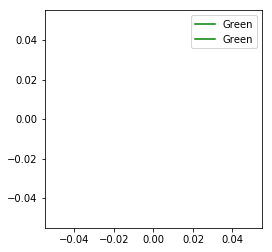

In [102]:
import pylab as pl
mycmap = pl.cm.jet # for example
for entry in pl.unique(gameboard):
    mycolor = 'green'
    pl.plot(0, 0, "-", c=mycolor, label="Green")
pl.legend()
pl.imshow(gameboard)
